# Plots

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from helper import *
%matplotlib inline

In [24]:
def plotFile(filename, i=None, numRows=None, numCols=None, maxElements=None):
    data = np.array(readFromFile(filename))
    #
    #plt.figure()
    
    if i is not None and numRows is not None and numCols is not None: 
        plt.subplot(numRows, numCols, i + 1)
    else:
        plt.figure(figsize=(12, 9))
        
    if maxElements is not None:
        dataToPlot = data[:maxElements]
    else:
        dataToPlot = data
        
    plt.plot(np.arange(len(dataToPlot)), dataToPlot, )
    #plt.ylim([0, 200])
    return data

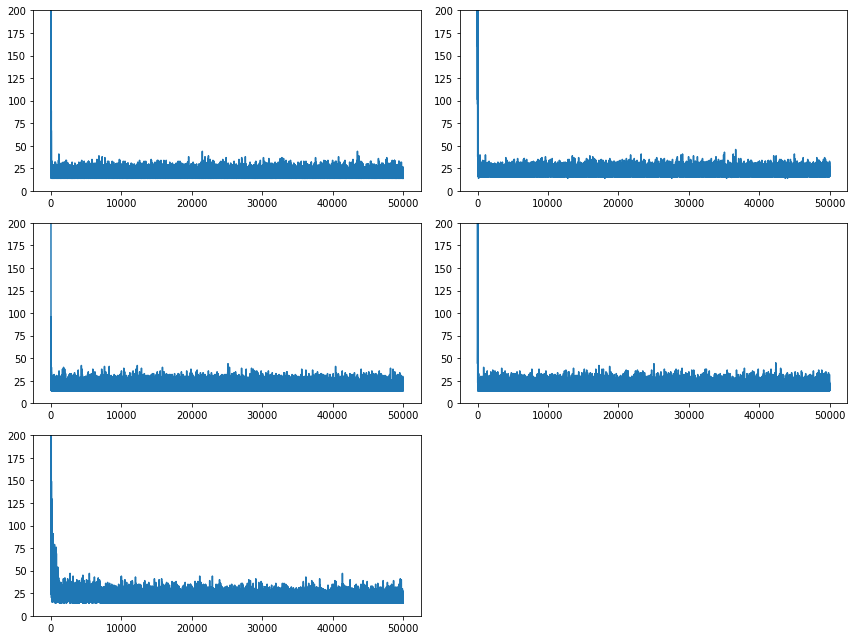

In [18]:
plt.figure(figsize=(12, 9))
numberOfSteps = plotFile("results/numberOfSteps_Q-Learning.json", 0, 3, 2)
numberOfSteps = plotFile("results/numberOfSteps_SARSA.json", 1, 3, 2)
numberOfSteps = plotFile("results/numberOfSteps_Actor-Critic.json", 2, 3, 2)
numberOfSteps = plotFile("results/numberOfSteps_QV-Learning.json", 3, 3, 2)
numberOfSteps = plotFile("results/numberOfSteps_ACLA.json", 4, 3, 2)
plt.tight_layout()

In [4]:
rewards = np.array(readFromFile("results/allRewardsIntakes_Q-Learning.json"))
len(rewards)
rewards[2499:-2500:2500].sum() / 20
91.1 / 20

4.555

In [5]:
numberOfSteps.min()

14.0

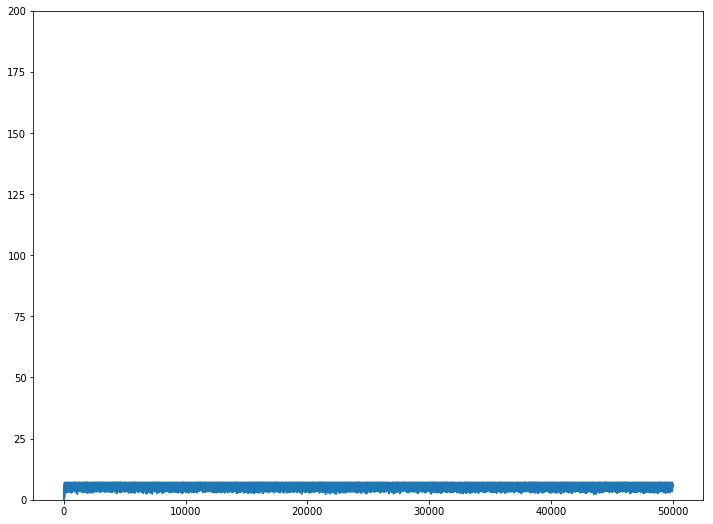

In [21]:
allRewardsIntakes = plotFile("results/allRewardsIntakes_Q-Learning.json")

# Experiment 1 

## Single Algorithms 

In [10]:
data = readComplexJson("resultsSingleAlgorithm.json")

In [11]:
algorithms = ["Q-Learning", "SARSA", "Actor-Critic", "QV-Learning", "ACLA"]
finalRes_single = {algo: {"mean": 0, "std": 0} for algo in algorithms}
cumulRes_single = {algo: {"mean": 0, "std": 0} for algo in algorithms}

res_single = {algo: {"final": 0, "cumul": 0} for algo in algorithms}

for algo in algorithms:
    final = [data[key][0] for key in data if key[0] == algo]
    cumul = [data[key][1] for key in data if key[0] == algo]
    
    finalRes_single[algo]["mean"] = np.mean(final)
    finalRes_single[algo]["std"] = np.std(final)
    
    cumulRes_single[algo]["mean"] = np.mean(cumul)
    cumulRes_single[algo]["std"] = np.std(cumul)
    
print("Final results")
print(json.dumps(finalRes_single, indent=3))
print("Cumul results")
print(json.dumps(cumulRes_single, indent=3))

Final results
{
   "SARSA": {
      "mean": 4.838936771423959,
      "std": 0.17607735820859782
   },
   "Actor-Critic": {
      "mean": 4.855568944714282,
      "std": 0.12011959085812904
   },
   "QV-Learning": {
      "mean": 4.850565863019696,
      "std": 0.1326231753090119
   },
   "ACLA": {
      "mean": 4.747155608410631,
      "std": 0.4233245482025312
   },
   "Q-Learning": {
      "mean": 4.832716359683658,
      "std": 0.16949001236863268
   }
}
Cumul results
{
   "SARSA": {
      "mean": 97.27421329688295,
      "std": 6.04105292707039
   },
   "Actor-Critic": {
      "mean": 96.92020197128467,
      "std": 5.4681771095008544
   },
   "QV-Learning": {
      "mean": 97.12186157345828,
      "std": 5.476687961147747
   },
   "ACLA": {
      "mean": 90.99300749598687,
      "std": 10.603909191538563
   },
   "Q-Learning": {
      "mean": 96.99146889271204,
      "std": 5.862467573202897
   }
}


## Ensemble Methods 

In [12]:
data = readComplexJson("resultsEnsemble.json")

ensembles = ["Majority", "Rank", "Boltzmann Addition", "Boltzmann Multiplication"]
finalRes_ensembles = {algo: {"mean": 0, "std": 0} for algo in ensembles}
cumulRes_ensembles = {algo: {"mean": 0, "std": 0} for algo in ensembles}

for algo in ensembles:
    final = [data[key][0] for key in data if key[0] == algo]
    cumul = [data[key][1] for key in data if key[0] == algo]
    
    finalRes_ensembles[algo]["mean"] = np.mean(final)
    finalRes_ensembles[algo]["std"] = np.std(final)
    
    cumulRes_ensembles[algo]["mean"] = np.mean(cumul)
    cumulRes_ensembles[algo]["std"] = np.std(cumul)
    
print("Final results")
print(json.dumps(finalRes_ensembles, indent=3))
print("Cumul results")
print(json.dumps(cumulRes_ensembles, indent=3))

Final results
{
   "Rank": {
      "mean": 4.845236812920206,
      "std": 0.08728829244051106
   },
   "Boltzmann Multiplication": {
      "mean": 4.260474036707816,
      "std": 0.6781960582705131
   },
   "Majority": {
      "mean": 4.810288611150387,
      "std": 0.16440224647780807
   },
   "Boltzmann Addition": {
      "mean": 4.844699580055157,
      "std": 0.034976304816175904
   }
}
Cumul results
{
   "Rank": {
      "mean": 95.9122758289203,
      "std": 5.196217995323917
   },
   "Boltzmann Multiplication": {
      "mean": 78.11573728949108,
      "std": 12.571040542952707
   },
   "Majority": {
      "mean": 93.41133910501512,
      "std": 6.034274720436644
   },
   "Boltzmann Addition": {
      "mean": 96.8367281526274,
      "std": 4.823815751765192
   }
}


([<matplotlib.axis.XTick at 0x7f22ebe8b5c0>,
 <a list of 9 Text xticklabel objects>)

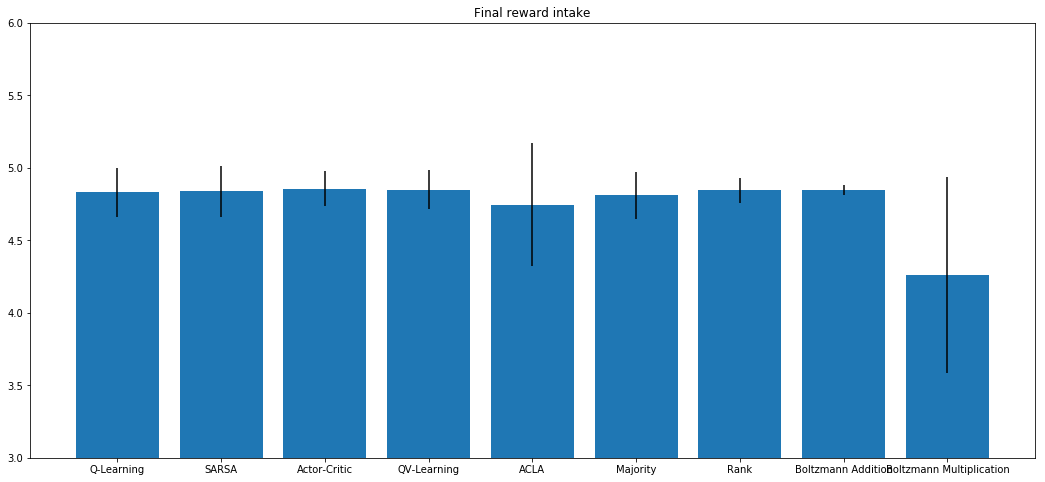

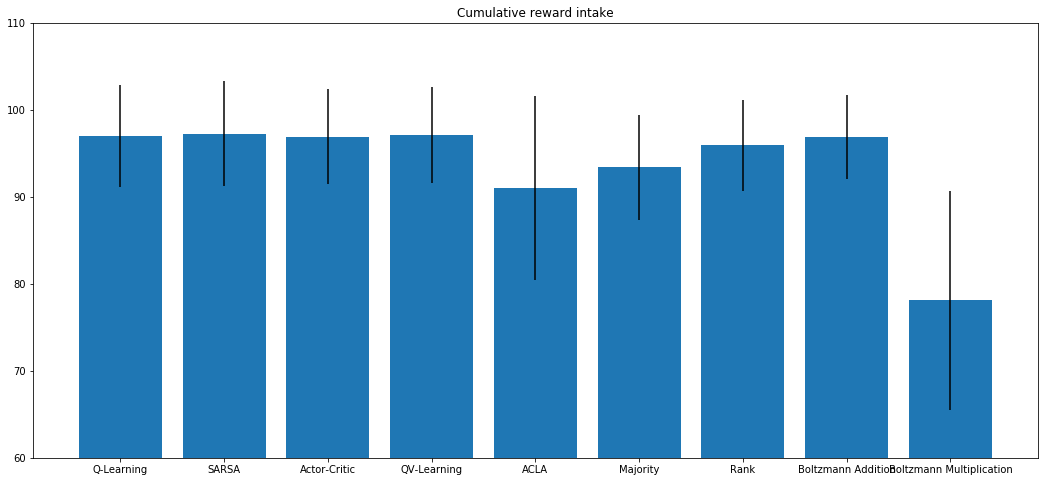

In [13]:
algos = algorithms + ensembles

all_res_final = dict(finalRes_single)
all_res_final.update(finalRes_ensembles)

res_final_mean = [all_res_final[algo]["mean"] for algo in algos]
res_final_std = [all_res_final[algo]["std"] for algo in algos]

plt.figure(figsize=(18,8))
plt.title("Final reward intake")
plt.ylim(3,6)
plt.bar([i for i in range(len(algos))], res_final_mean, yerr=res_final_std)
plt.xticks([i for i in range(len(algos))],algos)

all_res_cumul = dict(cumulRes_single)
all_res_cumul.update(cumulRes_ensembles)

res_cumul_mean = [all_res_cumul[algo]["mean"] for algo in algos]
res_cumul_std = [all_res_cumul[algo]["std"] for algo in algos]

plt.figure(figsize=(18,8))
plt.title("Cumulative reward intake")
plt.ylim(60, 110)
plt.bar([i for i in range(len(algos))], res_cumul_mean, yerr=res_cumul_std)
plt.xticks([i for i in range(len(algos))],algos)

## Neuronal

<Figure size 1600x900 with 0 Axes>

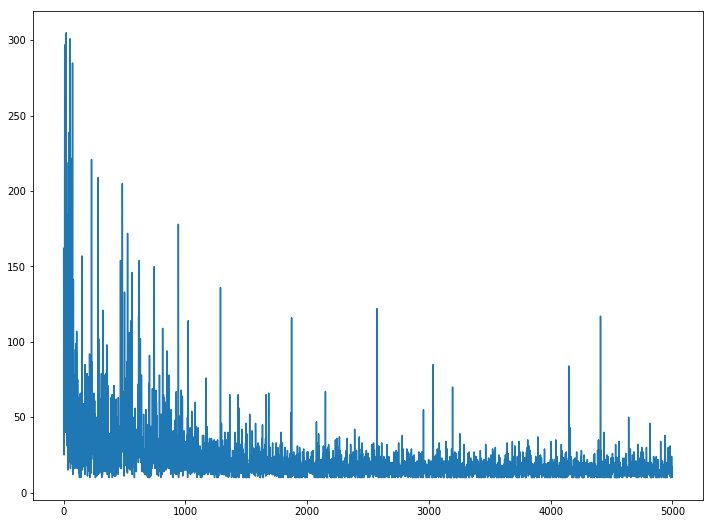

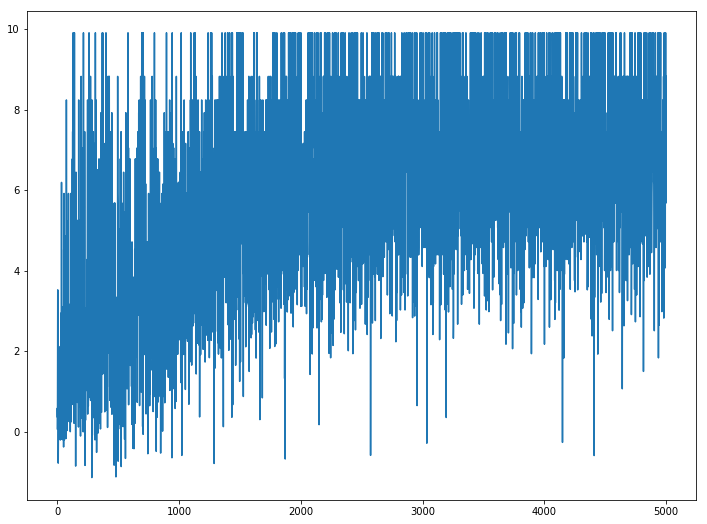

In [26]:
plt.figure(figsize=(16, 9))
numberOfSteps = plotFile("results/nnQLearningNumSteps.json", maxElements=5000)
numberOfSteps = plotFile("results/nnQLearningRewards.json", maxElements=5000)

In [30]:
nnQ = np.array(readFromFile("results/nnQLearningRewards.json"))[:5000]

In [31]:
nnQ[:5000]

array([0.07222222, 0.58645833, 0.35512821, ..., 5.67647059, 8.24166667,
       8.82727273])